In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering ,KMeans, DBSCAN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Task7 dataset.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

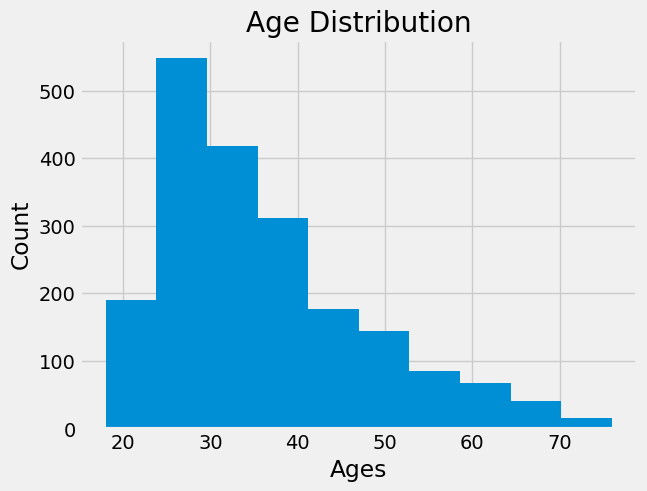

In [ ]:
plt.hist(df['Age'])

plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Count')

plt.show


Text(0.5, 1.0, 'Sex Distribution')

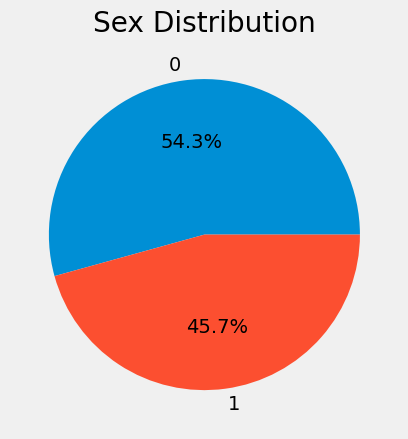

In [ ]:
gender= df['Sex'].value_counts()
plt.pie(gender, labels=gender.index, autopct='%1.1f%%')
plt.title("Sex Distribution")

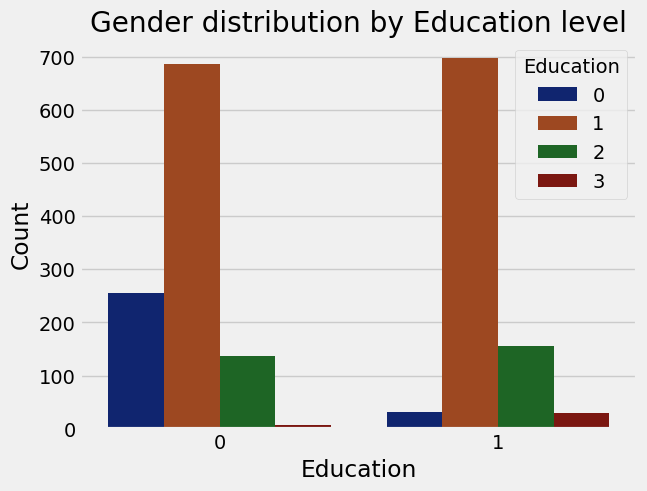

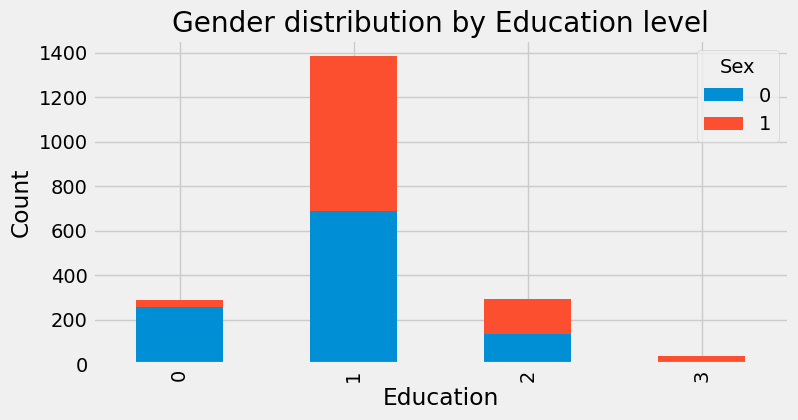

In [ ]:
sns.countplot(x=df['Sex'], hue=df['Education'], palette='dark')
plt.title("Gender distribution by Education level")
plt.xlabel("Education")
plt.ylabel("Count")

plt.show()

#using a stacked plot
pivot_df = df.pivot_table(index='Education', columns='Sex', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 4))

plt.title("Gender distribution by Education level")
plt.xlabel("Education")
plt.ylabel("Count")

plt.show()

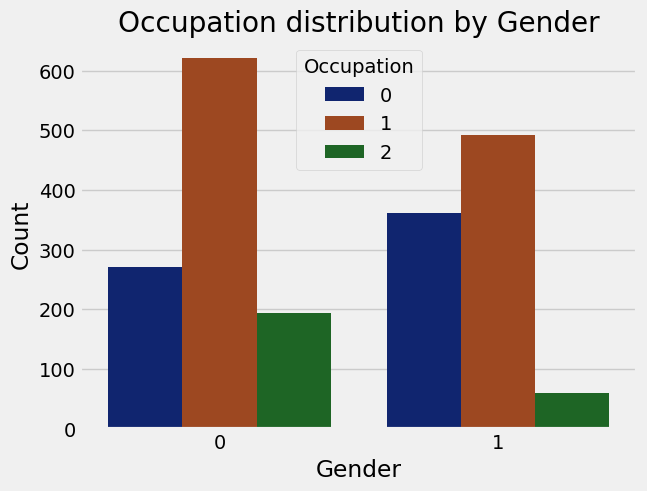

In [ ]:
sns.countplot(x=df['Sex'], hue=df['Occupation'], palette='dark')
plt.title("Occupation distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

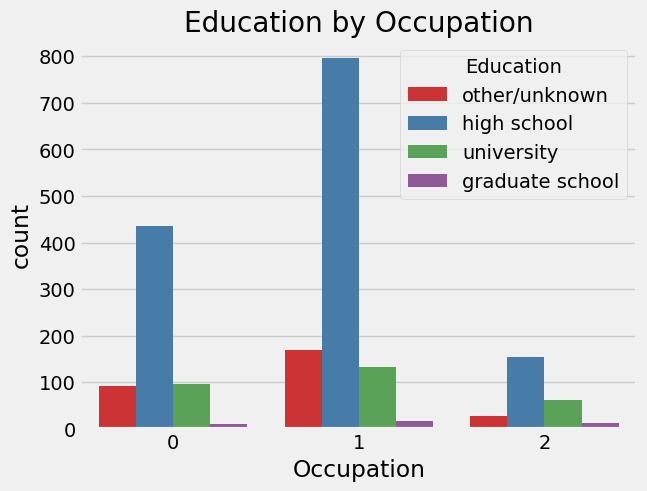

In [ ]:
sns.countplot(x=df['Occupation'], hue=df['Education'], palette='Set1')


plt.title('Education by Occupation')
plt.xlabel('Occupation')
plt.ylabel('count')
plt.legend(title='Education', labels=['other/unknown', 'high school', 'university', 'graduate school'])

plt.show()

# **EDA Conclusion:**

The analysis shows insight into customers segmentation based on demographic factors( age, gender,marital status, education, income and occupation) and geographical segmentation(settlement size). Findings show that a high proportion of are young individuals, more male customers. Older customers are more educated as it takes more years to achieve higher educational qualification and income tend to increase with age. Also it is seen that more females are educated and yet more males are in the management/self-employed/highly qualified employee occupation category

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[['Age', 'Income']])

KMeans(n_clusters=4, random_state=42)

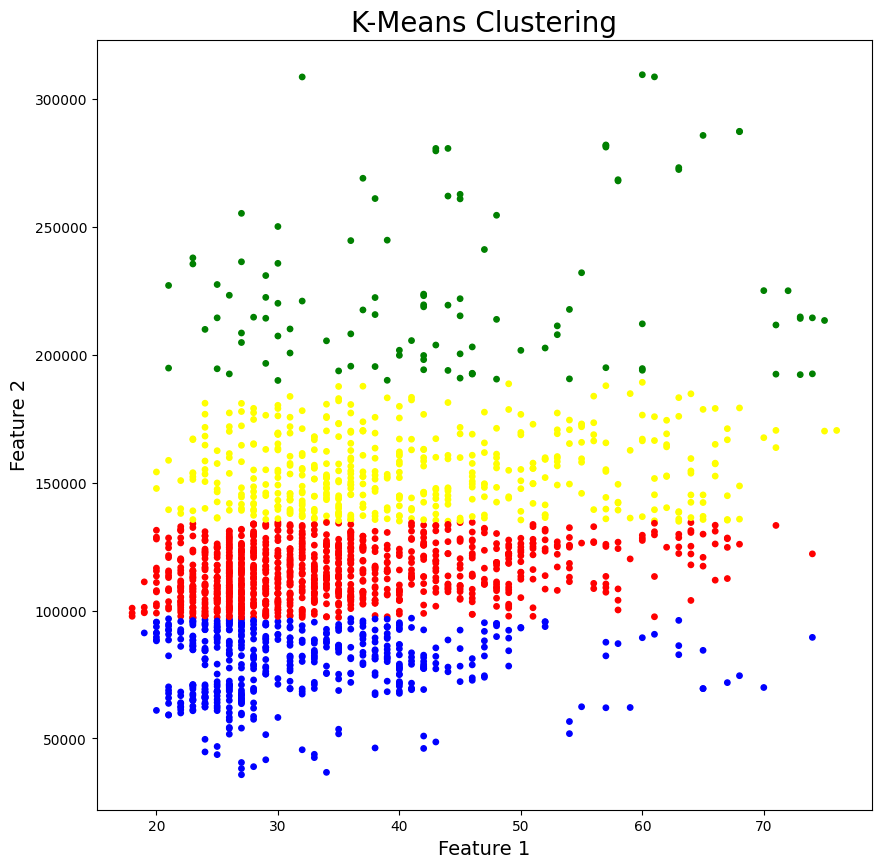

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['Age'],df['Income'],c=df['KMeans_labels'],cmap=colors.ListedColormap(np.array(['red','green','blue','yellow'])),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# **DBScan Clustering**

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. \ The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density \ and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point
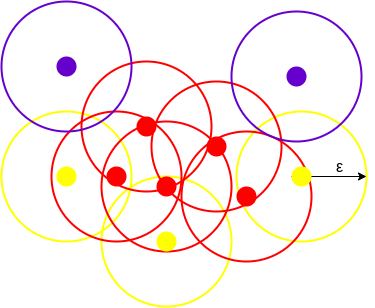

This is what it looks like:

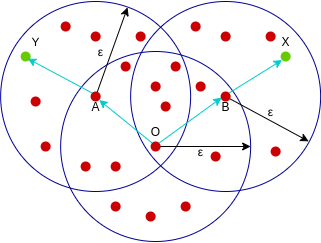

# **How DBSCAN clustering works?**

Initial parameters to create DBSCAN :

 **eps:** To find the clusters circles are used. Put radius value of circle in eps to create a circle. For creating a big circle most of the data will come into that circle and for a small circle, less data will come into that circle. So it is a problem to select the right eps value. To solve this problem find eps value based on the k-distance graph.

**Minpts:** After creating a circle you have to define that how many minimum data points should come in that circle. Define the minimum number of data points you want in minpts. If more values come in the circle then no problem but the minimum data point should come that you defined in minpts.

**Noise point or outlier:** That data point that can't complete the conditions of core point and border point is called a noise point.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(df[['Age', 'Income']])

DBSCAN()

In [ ]:
#creating a copy
data_db = df.copy()

In [ ]:
#Standardizing the data
scaler = StandardScaler()
scaled_data_db = scaler.fit_transform(data_db.iloc[:,1:])
scaled_data_db

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.29682303,
         1.552326  , -0.97101937],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.29682303,
         1.552326  ,  1.4147776 ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -1.26952539,
        -0.90972951,  0.61951195],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -1.26952539,
        -0.90972951,  0.61951195],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -1.26952539,
        -0.90972951, -0.97101937],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.26952539,
        -0.90972951,  0.61951195]])

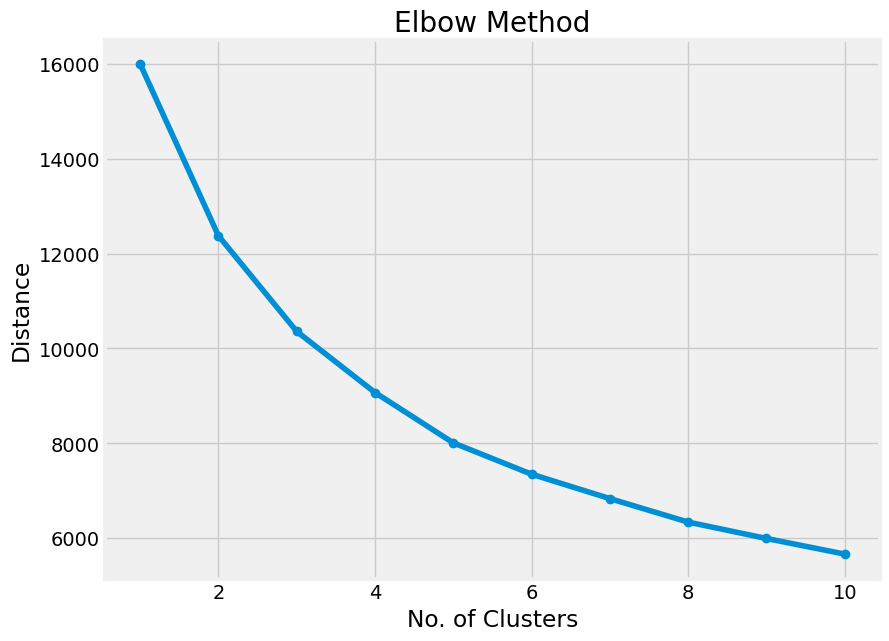

In [ ]:
plt.figure(figsize=(10,7))
SSE = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i,random_state=0)
  kmeans2.fit(scaled_data_db)
  SSE.append(kmeans2.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),SSE, marker = "o")
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Distance")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
#creating clusters
dbscan = DBSCAN(eps=4, min_samples=11)
dbscan.fit(scaled_data_db)

DBSCAN(eps=4, min_samples=11)

In [ ]:
#assigning the clusters to the datset
data_db["cluster_db"] = dbscan.labels_
data_db.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans_labels,cluster_db
0,100000001,0,0,67,2,124670,1,2,0,0
1,100000002,1,1,22,1,150773,1,2,3,0
2,100000003,0,0,49,1,89210,0,0,2,0
3,100000004,0,0,45,1,171565,1,1,3,0
4,100000005,0,0,53,1,149031,1,1,3,0


In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
scalar = MinMaxScaler()
X = scalar.fit_transform(df)

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=22).fit(X)
pred_labels = dbscan.labels_
df['db_cluster'] = dbscan.labels_
df['db_cluster'] = df['db_cluster'].astype('category')

print(f"Number of clusters: {len(np.unique(pred_labels))} \
      \nNumber of outliers: {len(pred_labels[pred_labels==-1])}")

Number of clusters: 5       
Number of outliers: 12


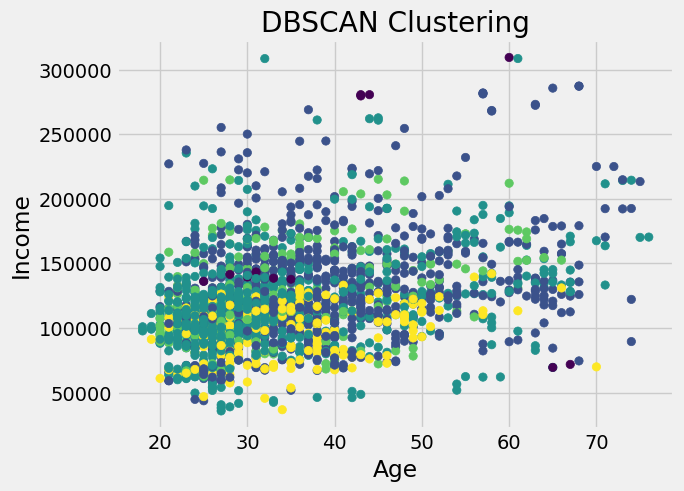

In [ ]:
# DBSCAN clustering visualization
plt.scatter(df['Age'], df['Income'],c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()